#**Iteración 2 EDA de la base de datos Air Quality Prediction**

El siguiente archivo contiene el "análisis exploratorio de datos" (EDA) de la base de datos usada para la competencia "EMC Data Science Global Hackathon (Air Quality Prediction)". El link para obtener información detallada de dicha competencia se expone a continuación:

https://www.kaggle.com/c/dsg-hackathon


Además, es necesario destacar que el desarrollo de este análsis es basado en un tutorial de Jason Brownlee, quien es Ph.D. en aprendizaje de maquina. El link del tutorial se expone a continuación:

https://machinelearningmastery.com/how-to-load-visualize-and-explore-a-complex-multivariate-multistep-time-series-forecasting-dataset/

##1.- Descripción del problema y de los datos
El conjunto de datos fue liberado el 2012, para una competencia nombrada "EMC Data Science Global Hackathon (Air Quality Prediction)" ("conjunto de datos AQP" de ahora en adelante para abreviar), estos fueron proporcionados por el gobierno local del Condado de Cook, Illinois, Estados Unidos. La base de datos corresponde a un conjunto de series temporales que contiene las condiciones climáticas de distintas ubicaciones del condado, con el objetivo de realizar predicciones de las mediciones de la calidad del aire durante los días siguientes.

El conjunto de datos AQP cuenta con 5 archivos, los cuales se listan a continuación

1. SiteLocations.csv
2. SiteLocations_with_more_sites.csv
3. SubmissionZerosExceptNAs.csv
4. TrainingData.csv
5. sample_code.r

El estudio se centrará en el archivo "TrainingData.csv", debido a que contiene los datos de entrenamiento. Estos datos contienen mediciones por hora de varias cantidades, muchas de ellas contaminantes, de tal forma que cada fila corresponde a las mediciones de una hora. Además, la base de datos fue dividida en porciones de tiempo ("fragmentos") de 11 días, sin embargo, solo los primeros 8 días de cada fragmento están disponibles en los datos de entrenamiento. El resto de los datos, osea los 3 días restantes de los fragmentos, fueron utilizados por los jueces de la competencia para probar los modelos de los participantes, sin embargo, este conjunto de datos de prueba no fue liberado posteriormente, por lo que para este trabajo solo se cuenta con la base de datos con fragmentos de 8 días de observaciones y variables objetivo. Finalmente, lo que se pedía en la competencia era realizar predicciones sobre varias ubicaciones dentro de los siguientes 3 días (1, 2, 3, 4, 5, 10, 17, 24, 48 y 72 horas después del final de los datos de entrenamiento).

El ganador de la hackaton logró un MAE de 0.21058, y el predictor lo obtuvo utilizando el método "Random Forest". A continuación se expone la publicación donde el ganador comenta su solución: 

https://medium.com/kaggle-blog/chucking-everything-into-a-random-forest-ben-hamner-on-winning-the-air-quality-prediction-788be7620e69

Cabe destacar que esto corresponde a la segunda iteración del EDA, el cual se desarrolla con un conjunto reducido de los datos. Los cambios realizados a la base de datos original se presentan a continuación:

1.   Se pasan de 39 variables objetivo a 1. Los ganadores de la competencia realizaron un modelo para cada una de las variables objetivo, por lo que se justifica la decisión de realizar un predictor para una variable ojetivo. Se decide trabajar con esta variable porque corresponde a la que tiene menos perdida de información.
2.   Se pasa de 56 varibles de entrada meteorologicas a 40, esto se realiza eliminando las variables que tienen mayor del 75% de los datos perdidos.
3.   Se eliminan las filas correspondientes a 3 fragmentos que contenian en total menos de 100 filas por fragmento. 

##2.- Análisis de la estructura general de los datos.


A continuación se vincula Google Drive con el servidor que ejecuta este código. De esta manera se realiza la lectura de los datos.

In [2]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls

Cook/            filterData3.csv    SiteLocations_with_more_sites.csv
filterData1.csv  sample_code.r      SubmissionZerosExceptNAs.csv
filterData2.csv  SiteLocations.csv  TrainingData.csv


In [ ]:
ls gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/

ls: cannot access 'gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/': No such file or directory


In [3]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP


In [ ]:
ls

Cook/            filterData3.csv    SiteLocations_with_more_sites.csv
filterData1.csv  sample_code.r      SubmissionZerosExceptNAs.csv
filterData2.csv  SiteLocations.csv  TrainingData.csv


2.1- Lectura 

En esta segunda iteración se decide pasar por alto casi todos los pasos del análisis de la estructura general de los datos, debido a que estos no difieren mucho de la primera iteración.

In [4]:
import pandas as pd
df = pd.read_csv('filterData1.csv', header=0)
df.head()

rowID  chunkID  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0      1        1  ...                            NaN       0.184045
1      2        1  ...                            NaN       0.184045
2      3        1  ...                            NaN       0.184045
3      4        1  ...                            NaN       0.184045
4      5        1  ...                            NaN       0.184045

[5 rows x 47 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rowID                          37619 non-null  int64  
 1   chunkID                        37619 non-null  int64  
 2   position_within_chunk          37619 non-null  int64  
 3   month_most_common              37619 non-null  int64  
 4   weekday                        37619 non-null  object 
 5   hour                           37619 non-null  int64  
 6   Solar.radiation_64             37193 non-null  float64
 7   WindDirection..Resultant_1     36189 non-null  float64
 8   WindDirection..Resultant_1018  9728 non-null   float64
 9   WindSpeed..Resultant_1         36189 non-null  float64
 10  WindSpeed..Resultant_1018      9728 non-null   float64
 11  Ambient.Max.Temperature_50     12238 non-null  float64
 12  Ambient.Max.Temperature_52     36330 non-null 

##3- Exploración de las variables de entrada

Luego de eliminar algunas variables se pasa de tener 56 variables de entrada a tener 46 variables de entrada, donde las primeras 6 columnas de datos corresponden a variables relacionadas con el fragmento o con el tiempo de medición. Por su parte, de la columna 6 hasta la columna 45 corresponden a mediciones meterologicas para distintos puntos.

A continuación se listan las primeras 6 columnas de datos:

*   rowID
*   chunkID
*   position_within_chunk
*   month_most_common
*   weekday
*   hour

Ahora se listan las columnas correspondientes a mediciones meterologicas:

*   **Solar.radiation_64**
*   **WindDirection..Resultant_1**
*   **WindDirection..Resultant_1018**
*   **WindSpeed..Resultant_1**
*   **WindSpeed..Resultant_1018**
*   **Ambient.Max.Temperature_50**
*   **Ambient.Max.Temperature_52**
*   **Ambient.Max.Temperature_57**
*   **Ambient.Max.Temperature_76**
*   **Ambient.Max.Temperature_2001**
*   **Ambient.Max.Temperature_3301**
*   **Ambient.Max.Temperature_6005**
*   **Ambient.Min.Temperature_50**
*   **Ambient.Min.Temperature_52**
*   **Ambient.Min.Temperature_57**
*   **Ambient.Min.Temperature_76**
*   **Ambient.Min.Temperature_2001**
*   **Ambient.Min.Temperature_3301**
*   **Ambient.Min.Temperature_6005**
*   **Sample.Baro.Pressure_50**
*   **Sample.Baro.Pressure_52**
*   **Sample.Baro.Pressure_57**
*   **Sample.Baro.Pressure_76**
*   **Sample.Baro.Pressure_2001**
*   **Sample.Baro.Pressure_3301**
*   **Sample.Baro.Pressure_6005**
*   **Sample.Max.Baro.Pressure_50**
*   **Sample.Max.Baro.Pressure_52**
*   **Sample.Max.Baro.Pressure_57**
*   **Sample.Max.Baro.Pressure_76**
*   **Sample.Max.Baro.Pressure_2001**
*   **Sample.Max.Baro.Pressure_3301**
*   **Sample.Max.Baro.Pressure_6005**
*   **Sample.Min.Baro.Pressure_50**
*   **Sample.Min.Baro.Pressure_52**
*   **Sample.Min.Baro.Pressure_57**
*   **Sample.Min.Baro.Pressure_76**
*   **Sample.Min.Baro.Pressure_2001**
*   **Sample.Min.Baro.Pressure_3301**
*   **Sample.Min.Baro.Pressure_6005**

In [5]:
#Primero se convierten los dias a numeros

df.loc[df.weekday == "Monday", "weekday"] = "1"
df.loc[df.weekday == "Tuesday", "weekday"] = "2"
df.loc[df.weekday == "Wednesday", "weekday"] = "3"
df.loc[df.weekday == "Thursday", "weekday"] = "4"
df.loc[df.weekday == "Friday", "weekday"] = "5"
df.loc[df.weekday == "Saturday", "weekday"] = "6"
df.loc[df.weekday == "Sunday", "weekday"] = "7"

df['weekday'] = df['weekday'].astype(int)

df.head()


rowID  chunkID  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0      1        1  ...                            NaN       0.184045
1      2        1  ...                            NaN       0.184045
2      3        1  ...                            NaN       0.184045
3      4        1  ...                            NaN       0.184045
4      5        1  ...                            NaN       0.184045

[5 rows x 47 columns]

A continuación se definen las funciones que permiten analizar las variables del conjunto de datos utilizando los indices de las columnas.

##Función que permite analizar la estructura temporal con gráficos de linea

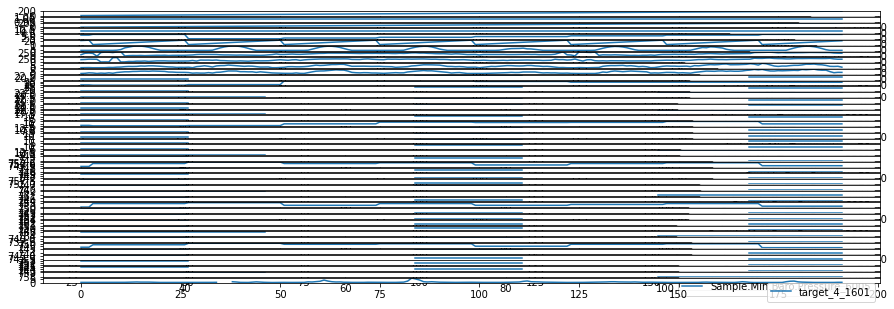

In [15]:
# plot inputs for a chunk
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# split the dataset by 'chunkID', return a dict of id to rows
def to_chunks(values, chunk_ix=1):
	chunks = dict()
	# get the unique chunk ids
	chunk_ids = unique(values[:, chunk_ix])
	# group rows by chunk id
	for chunk_id in chunk_ids:
		selection = values[:, chunk_ix] == chunk_id
		chunks[chunk_id] = values[selection, :]
	return chunks

# plot all columns for one or more chunk ids
def plot_chunk_columns(chunks, c_ids, names_columns, columnsToPlot):
  pyplot.figure(figsize = (15,5))
  for i in range(len(columnsToPlot)):
    ax = pyplot.subplot(len(columnsToPlot), 1, i+1)
    column = columnsToPlot[i]
    for chunk_id in c_ids:
      rows = chunks[chunk_id]
      pyplot.plot(rows[:,column], label=names_columns[column])
      pyplot.legend()
  pyplot.show()


name_columns = df.columns


# group data by chunks
values = df.values
chunks = to_chunks(values)
inputs = range(0, 47)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, inputs)

##Función que permite realizar gráfico de caja de un fragmento

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


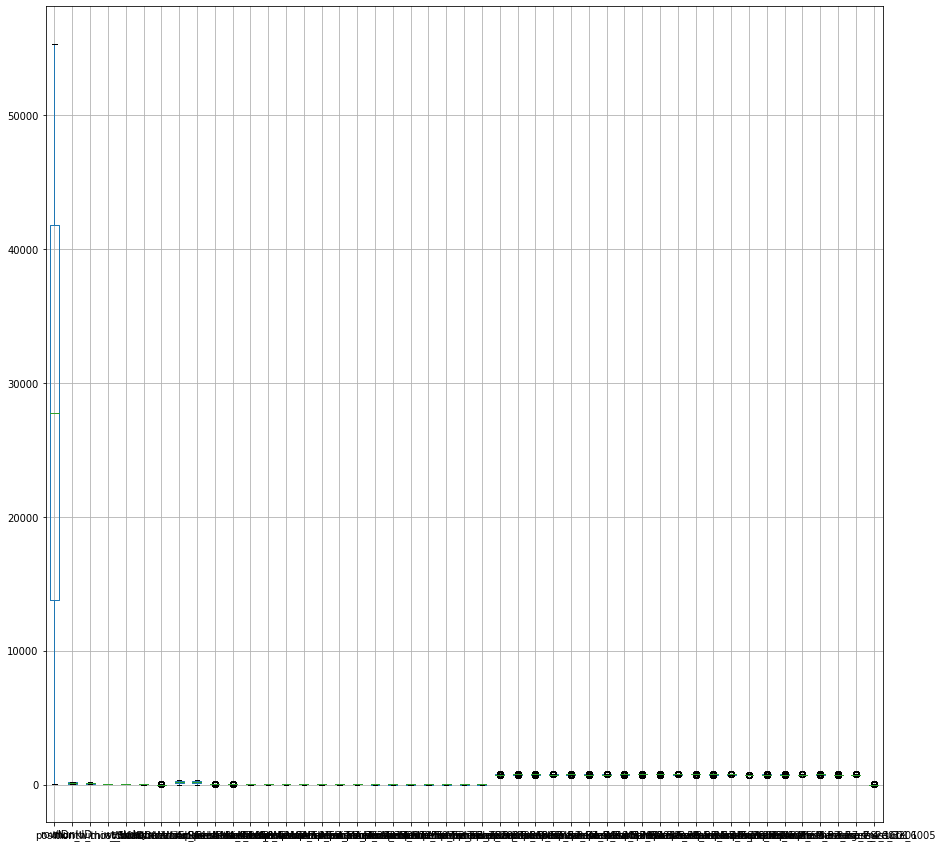

In [7]:
import numpy as np
# boxplot for columns  for a chuck
def plot_chunk_columns_boxplots(df, columnsToPlot):
  pyplot.figure(figsize = (15,15))
  df.iloc[:, columnsToPlot].boxplot()
  pyplot.show()


# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(0, 47)
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

##Estadisticas resumen

In [8]:
columnsToPlot = range(0, 47)
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

rowID       chunkID  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
count  37619.000000  37619.000000  ...                   11327.000000   37270.000000
mean   27769.146495    105.819506  ...                     740.182219       0.398977
std    16060.918635     60.834329  ...                       9.267723       0.676620
min        1.000000      1.000000  ...                     722.000000      -0.184045
25%    13808.500000     53.000000  ...                     734.000000       0.092022
50%    27765.000000    106.000000  ...                     737.000000       0.184045
75%    41828.500000    159.000000  ...                     744.000000       0.460112
max    55368.000000    210.000000  ...                     768.000000      15.275708

[8 rows x 47 columns]

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rowID                          37619 non-null  int64  
 1   chunkID                        37619 non-null  int64  
 2   position_within_chunk          37619 non-null  int64  
 3   month_most_common              37619 non-null  int64  
 4   weekday                        37619 non-null  int64  
 5   hour                           37619 non-null  int64  
 6   Solar.radiation_64             37193 non-null  float64
 7   WindDirection..Resultant_1     36189 non-null  float64
 8   WindDirection..Resultant_1018  9728 non-null   float64
 9   WindSpeed..Resultant_1         36189 non-null  float64
 10  WindSpeed..Resultant_1018      9728 non-null   float64
 11  Ambient.Max.Temperature_50     12238 non-null  float64
 12  Ambient.Max.Temperature_52     36330 non-null 

Sigue siendo imposible analizar las variables de entrada todas juntas, se procede a analizar por grupos de variables:

*   **Grupo 1**
  *   rowID
  *   chunkID
  *   position_within_chunk
  *   month_most_common
  *   weekday
  *   hour

*   **Grupo 2**
  *   Solar.radiation_64


*   **Grupo 3**
  *   WindDirection..Resultant_1
  *   WindDirection..Resultant_1018
  *   WindSpeed..Resultant_1
  *   WindSpeed..Resultant_1018


*  **Grupo 4**
  *   Ambient.Max.Temperature_50
  *   Ambient.Max.Temperature_52
  *   Ambient.Max.Temperature_57
  *   Ambient.Max.Temperature_76
  *   Ambient.Max.Temperature_2001
  *   Ambient.Max.Temperature_3301
  *   Ambient.Max.Temperature_6005

*   **Grupo 5**
  *   Ambient.Min.Temperature_50
  *   Ambient.Min.Temperature_52
  *   Ambient.Min.Temperature_57
  *   Ambient.Min.Temperature_76
  *   Ambient.Min.Temperature_2001
  *   Ambient.Min.Temperature_3301
  *   Ambient.Min.Temperature_6005

*   **Grupo 6**
  *   Sample.Baro.Pressure_50
  *   Sample.Baro.Pressure_52
  *   Sample.Baro.Pressure_57
  *   Sample.Baro.Pressure_76
  *   Sample.Baro.Pressure_2001
  *   Sample.Baro.Pressure_3301
  *   Sample.Baro.Pressure_6005

*   **Grupo 7**
  *   Sample.Max.Baro.Pressure_50
  *   Sample.Max.Baro.Pressure_52
  *   Sample.Max.Baro.Pressure_57
  *   Sample.Max.Baro.Pressure_76
  *   Sample.Max.Baro.Pressure_2001
  *   Sample.Max.Baro.Pressure_3301
  *   Sample.Max.Baro.Pressure_6005

*   **Grupo 8**
  *   Sample.Min.Baro.Pressure_50
  *   Sample.Min.Baro.Pressure_52
  *   Sample.Min.Baro.Pressure_57
  *   Sample.Min.Baro.Pressure_76
  *   Sample.Min.Baro.Pressure_2001
  *   Sample.Min.Baro.Pressure_3301
  *   Sample.Min.Baro.Pressure_6005

### Análisis grupo 1

*   **Grupo 1**
  *   rowID
  *   chunkID
  *   position_within_chunk
  *   month_most_common
  *   weekday
  *   hour

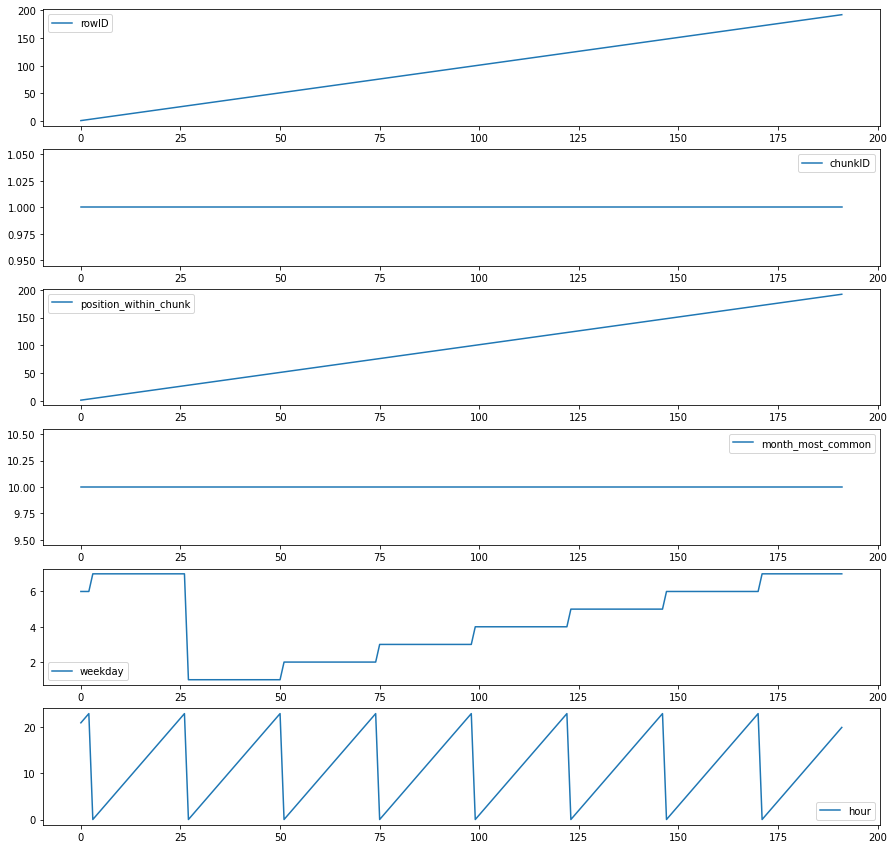

In [14]:
name_columns = df.columns

# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(0, 6)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

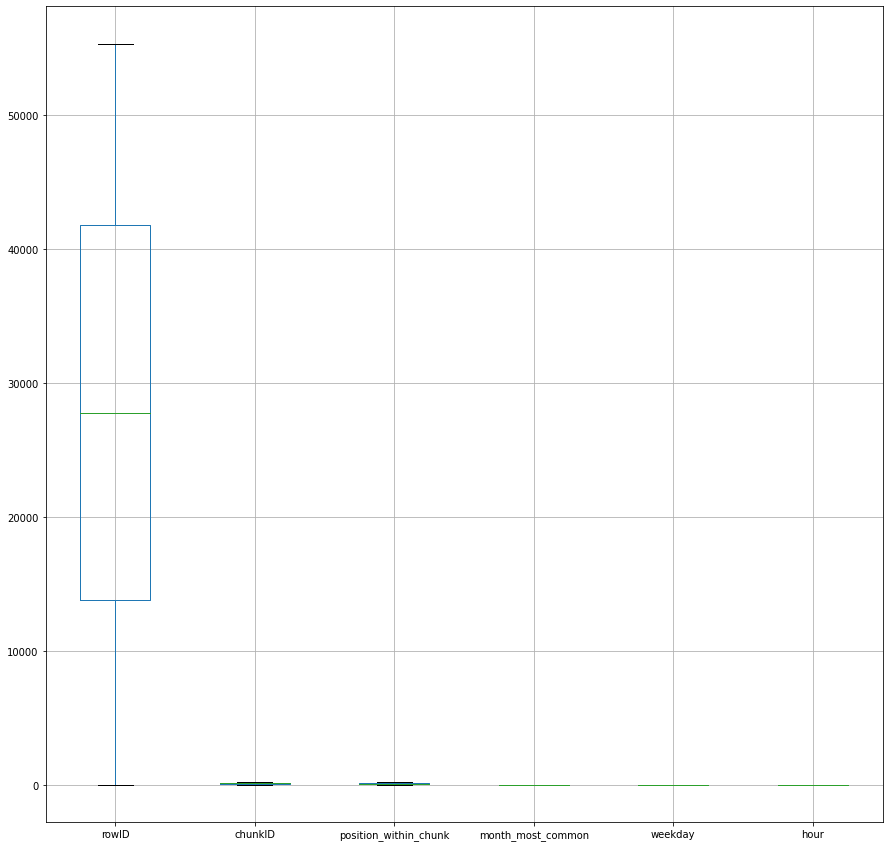

In [10]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [11]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

rowID       chunkID  ...       weekday          hour
count  37619.000000  37619.000000  ...  37619.000000  37619.000000
mean   27769.146495    105.819506  ...      4.022967     11.502645
std    16060.918635     60.834329  ...      1.971258      6.921409
min        1.000000      1.000000  ...      1.000000      0.000000
25%    13808.500000     53.000000  ...      2.000000      6.000000
50%    27765.000000    106.000000  ...      4.000000     12.000000
75%    41828.500000    159.000000  ...      6.000000     18.000000
max    55368.000000    210.000000  ...      7.000000     23.000000

[8 rows x 6 columns]

In [12]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   rowID                  37619 non-null  int64
 1   chunkID                37619 non-null  int64
 2   position_within_chunk  37619 non-null  int64
 3   month_most_common      37619 non-null  int64
 4   weekday                37619 non-null  int64
 5   hour                   37619 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#Los datos se ven sin outliers, pero se decide eliminar la varible "rowID"

###Análisis grupo 2

*   **Grupo 2**
  *   Solar.radiation_64

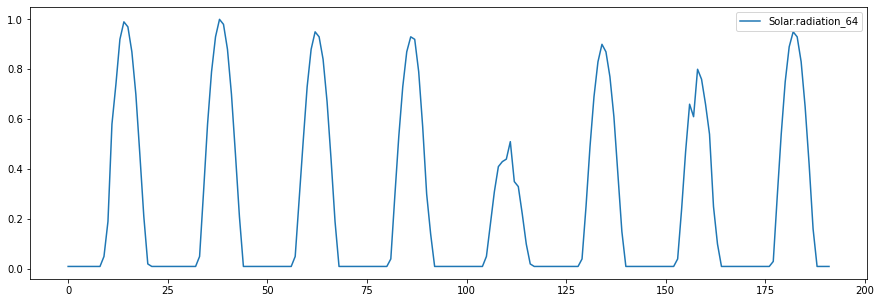

In [16]:
# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(6, 7)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

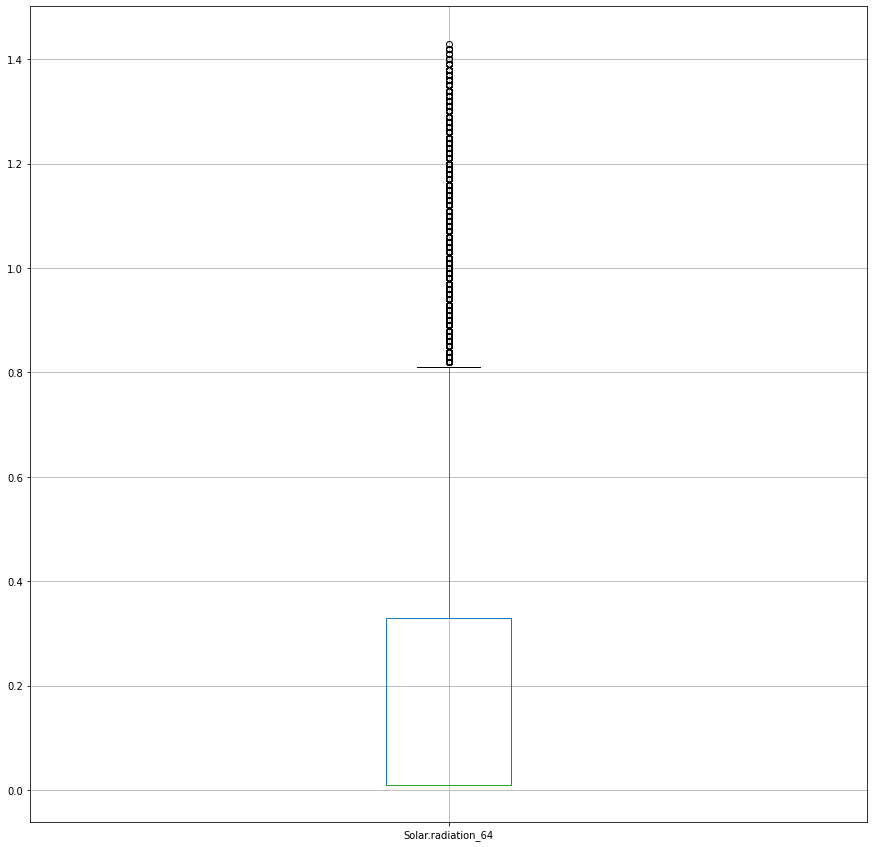

In [ ]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [ ]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

Solar.radiation_64
count        37193.000000
mean             0.223710
std              0.343951
min              0.010000
25%              0.010000
50%              0.010000
75%              0.330000
max              1.430000

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Solar.radiation_64  37193 non-null  float64
dtypes: float64(1)
memory usage: 294.0 KB


#Los datos se ven sin outliers

###Análisis grupo 3

*   **Grupo 3**
  *   WindDirection..Resultant_1
  *   WindDirection..Resultant_1018
  *   WindSpeed..Resultant_1
  *   WindSpeed..Resultant_1018

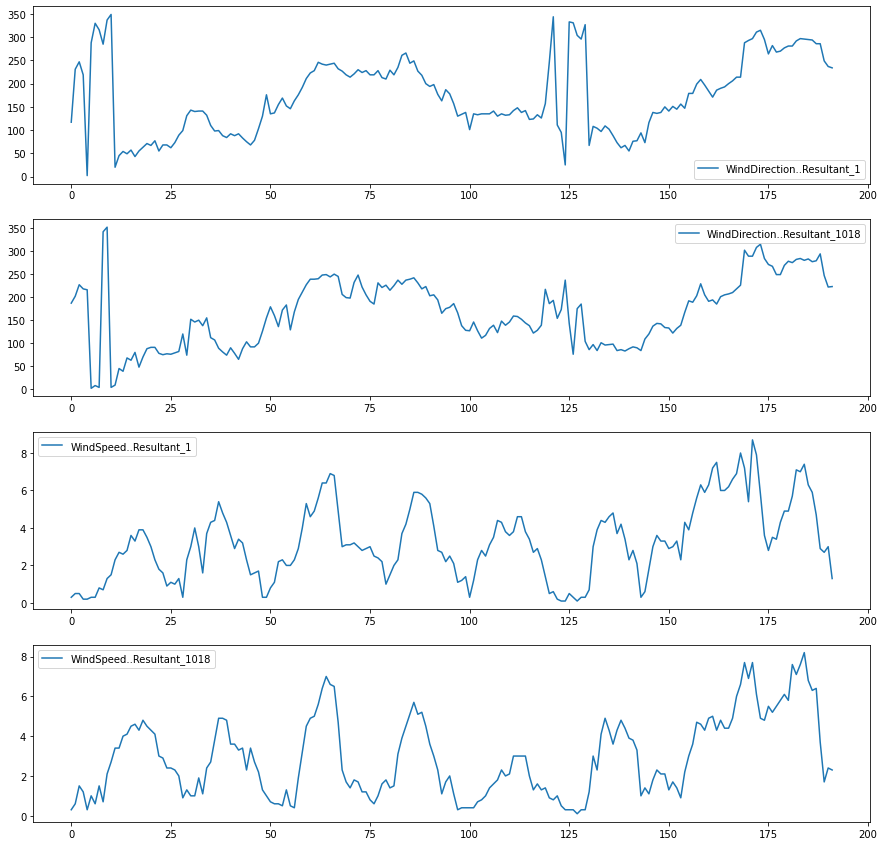

In [ ]:
# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(7, 11)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


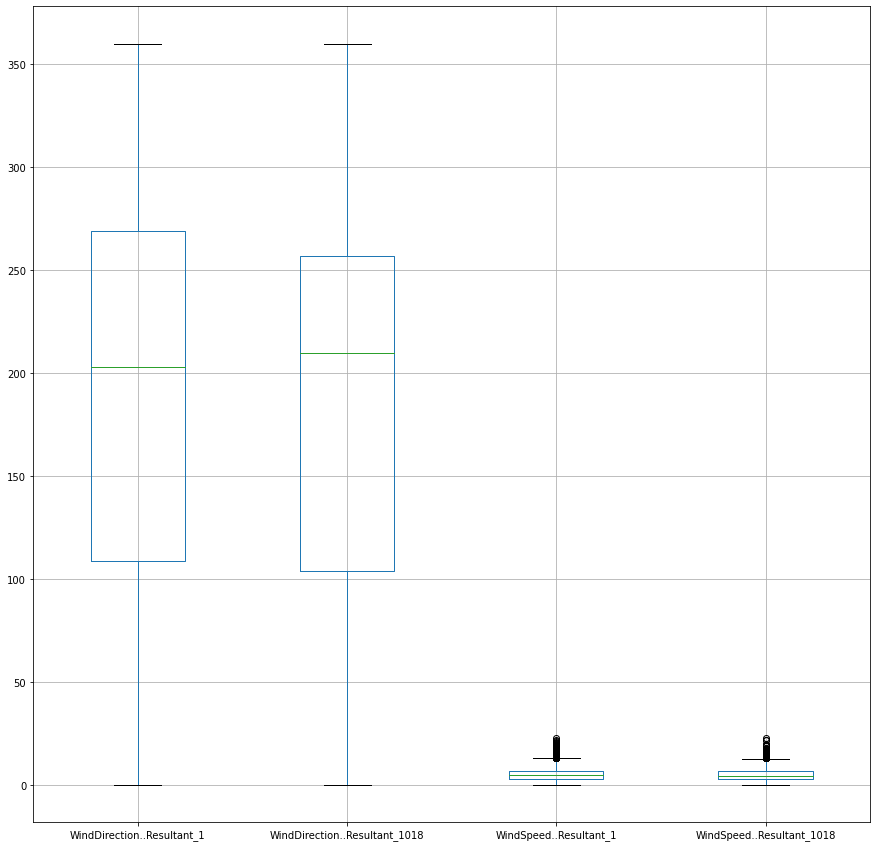

In [ ]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [ ]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

WindDirection..Resultant_1  ...  WindSpeed..Resultant_1018
count                36189.000000  ...                9728.000000
mean                   189.589104  ...                   5.006990
std                     96.542013  ...                   2.971165
min                      0.100000  ...                   0.100000
25%                    109.000000  ...                   2.800000
50%                    203.000000  ...                   4.600000
75%                    269.000000  ...                   6.800000
max                    360.000000  ...                  22.700000

[8 rows x 4 columns]

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WindDirection..Resultant_1     36189 non-null  float64
 1   WindDirection..Resultant_1018  9728 non-null   float64
 2   WindSpeed..Resultant_1         36189 non-null  float64
 3   WindSpeed..Resultant_1018      9728 non-null   float64
dtypes: float64(4)
memory usage: 1.1 MB


#Los datos se ven sin outliers

###Análisis grupo 4

*  **Grupo 4**
  *   Ambient.Max.Temperature_50
  *   Ambient.Max.Temperature_52
  *   Ambient.Max.Temperature_57
  *   Ambient.Max.Temperature_76
  *   Ambient.Max.Temperature_2001
  *   Ambient.Max.Temperature_3301
  *   Ambient.Max.Temperature_6005

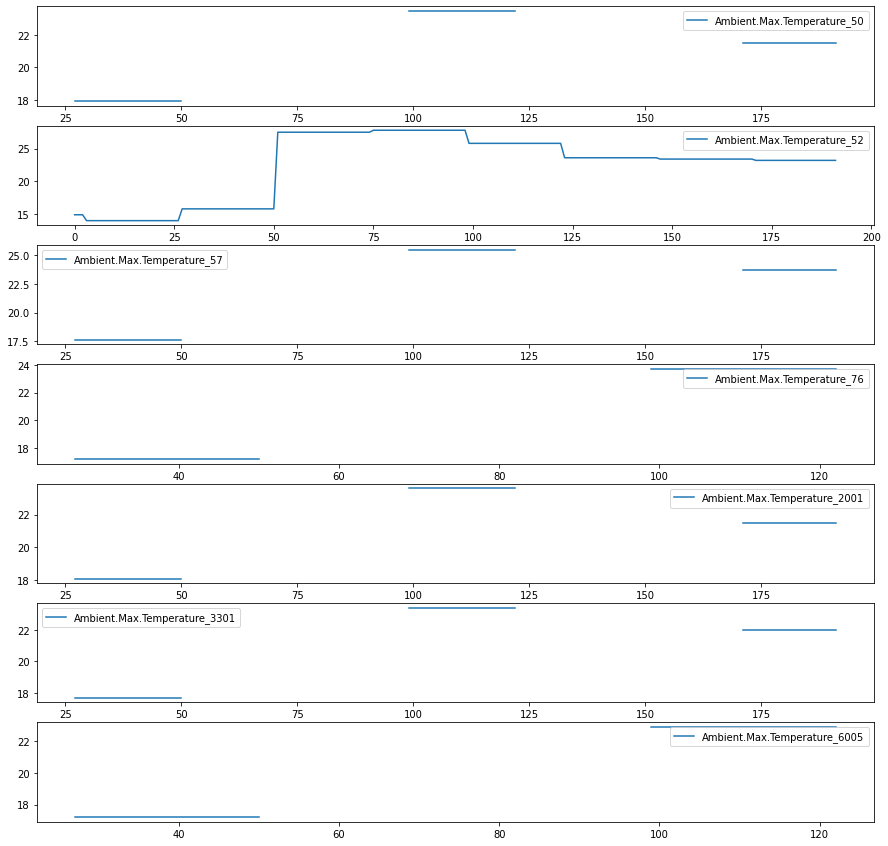

In [ ]:
# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(11, 18)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


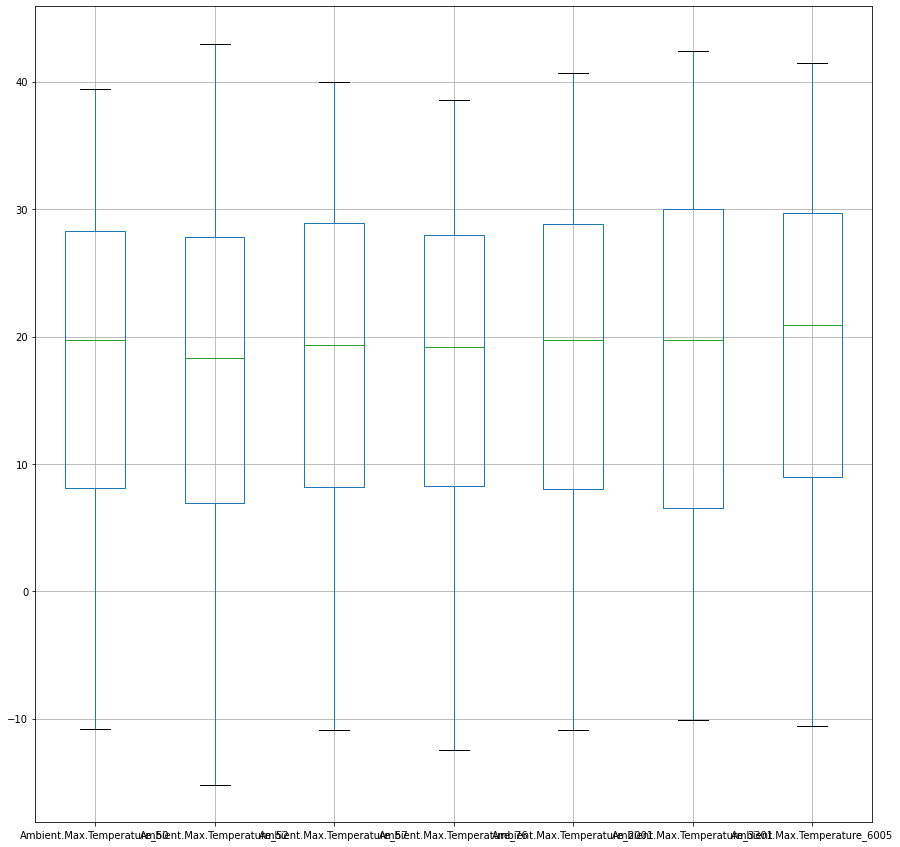

In [ ]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [ ]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

Ambient.Max.Temperature_50  ...  Ambient.Max.Temperature_6005
count                 12238.00000  ...                  11325.000000
mean                     17.99772  ...                     19.365148
std                      12.10184  ...                     12.431213
min                     -10.80000  ...                    -10.600000
25%                       8.10000  ...                      9.000000
50%                      19.70000  ...                     20.900000
75%                      28.30000  ...                     29.700000
max                      39.40000  ...                     41.500000

[8 rows x 7 columns]

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ambient.Max.Temperature_50    12238 non-null  float64
 1   Ambient.Max.Temperature_52    36330 non-null  float64
 2   Ambient.Max.Temperature_57    11776 non-null  float64
 3   Ambient.Max.Temperature_76    12099 non-null  float64
 4   Ambient.Max.Temperature_2001  12181 non-null  float64
 5   Ambient.Max.Temperature_3301  12590 non-null  float64
 6   Ambient.Max.Temperature_6005  11325 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


#Los datos se ven sin outliers

###Análisis grupo 5

*   **Grupo 5**
  *   Ambient.Min.Temperature_50
  *   Ambient.Min.Temperature_52
  *   Ambient.Min.Temperature_57
  *   Ambient.Min.Temperature_76
  *   Ambient.Min.Temperature_2001
  *   Ambient.Min.Temperature_3301
  *   Ambient.Min.Temperature_6005

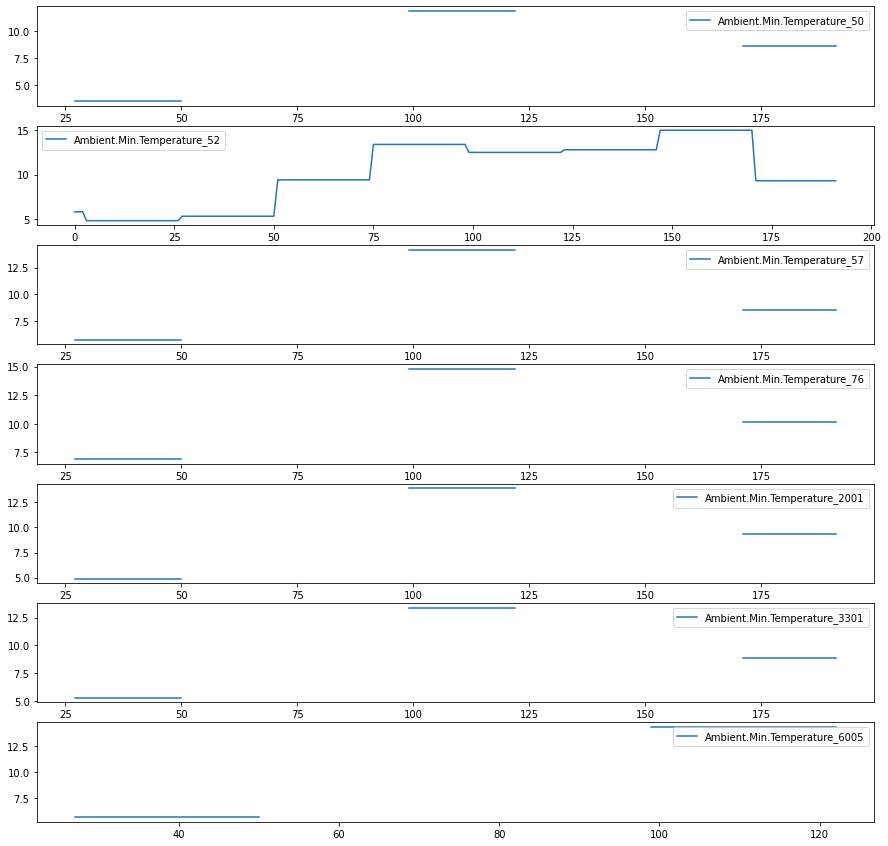

In [ ]:
# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(18, 25)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


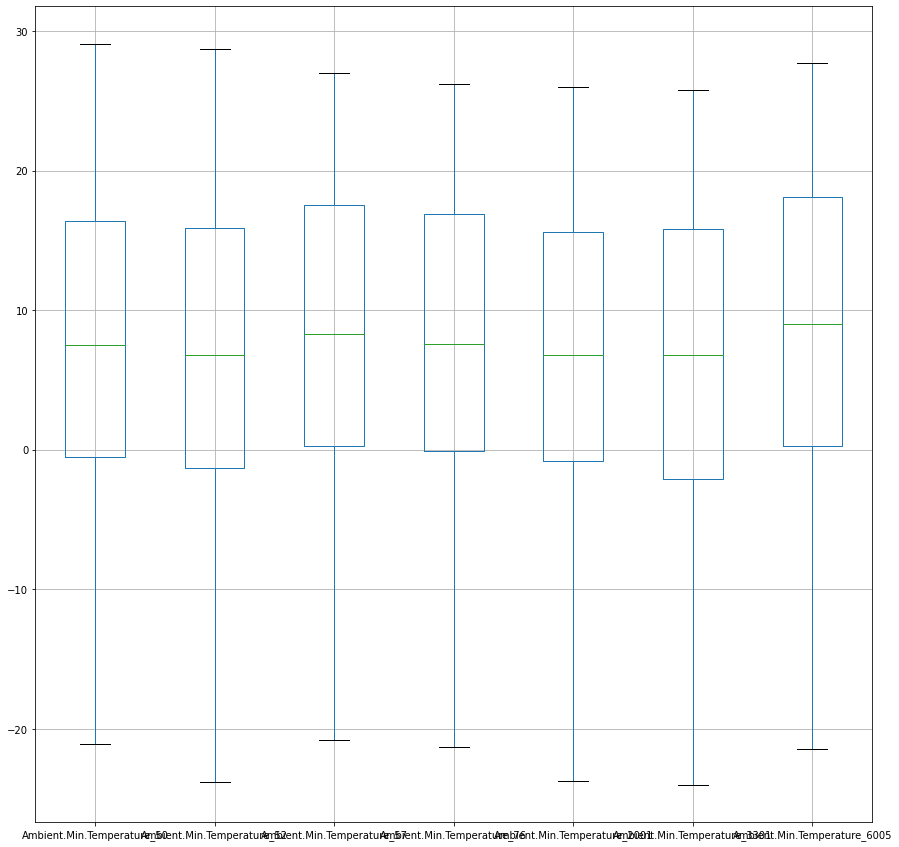

In [ ]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [ ]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

Ambient.Min.Temperature_50  ...  Ambient.Min.Temperature_6005
count                12519.000000  ...                  11436.000000
mean                     7.235770  ...                      8.166675
std                     10.553313  ...                     10.907207
min                    -21.100000  ...                    -21.400000
25%                     -0.500000  ...                      0.300000
50%                      7.500000  ...                      9.000000
75%                     16.400000  ...                     18.100000
max                     29.100000  ...                     27.700000

[8 rows x 7 columns]

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ambient.Min.Temperature_50    12519 non-null  float64
 1   Ambient.Min.Temperature_52    36613 non-null  float64
 2   Ambient.Min.Temperature_57    11776 non-null  float64
 3   Ambient.Min.Temperature_76    12352 non-null  float64
 4   Ambient.Min.Temperature_2001  12301 non-null  float64
 5   Ambient.Min.Temperature_3301  12686 non-null  float64
 6   Ambient.Min.Temperature_6005  11436 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


##Los datos se ven sin outliers.

Link que indica mediciones records de la temperatura: https://es.wikipedia.org/wiki/Anexo:R%C3%A9cords_meteorol%C3%B3gicos_mundiales


###Análisis grupo 6

*   **Grupo 6**
  *   Sample.Baro.Pressure_50
  *   Sample.Baro.Pressure_52
  *   Sample.Baro.Pressure_57
  *   Sample.Baro.Pressure_76
  *   Sample.Baro.Pressure_2001
  *   Sample.Baro.Pressure_3301
  *   Sample.Baro.Pressure_6005

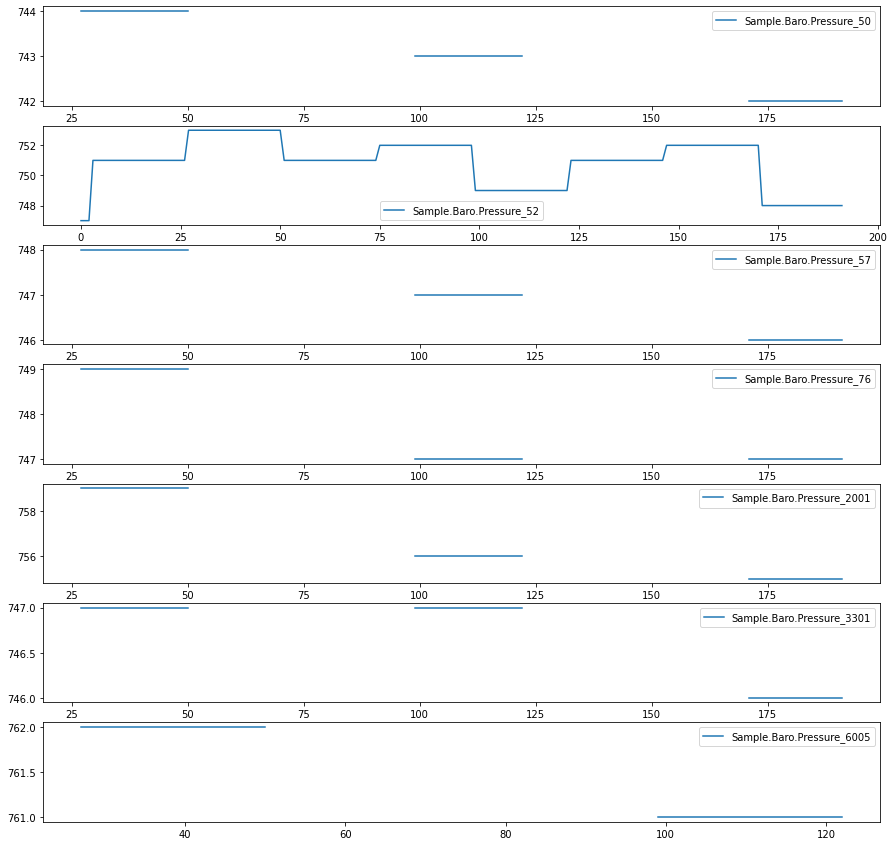

In [ ]:
# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(25, 32)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

In [ ]:
aux = df.loc[(df['chunkID'] == 1)]
aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rowID                          192 non-null    int64  
 1   chunkID                        192 non-null    int64  
 2   position_within_chunk          192 non-null    int64  
 3   month_most_common              192 non-null    int64  
 4   weekday                        192 non-null    object 
 5   hour                           192 non-null    int64  
 6   Solar.radiation_64             192 non-null    float64
 7   WindDirection..Resultant_1     192 non-null    float64
 8   WindDirection..Resultant_1018  192 non-null    float64
 9   WindSpeed..Resultant_1         192 non-null    float64
 10  WindSpeed..Resultant_1018      192 non-null    float64
 11  Ambient.Max.Temperature_50     69 non-null     float64
 12  Ambient.Max.Temperature_52     192 non-null    flo

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


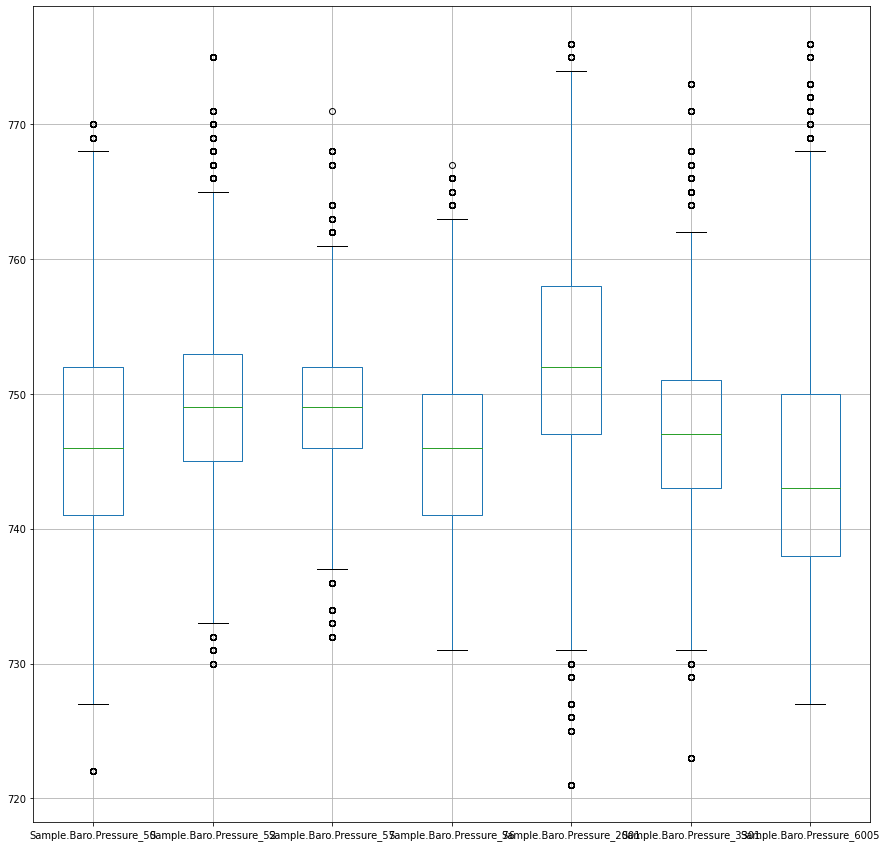

In [ ]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [ ]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

Sample.Baro.Pressure_50  ...  Sample.Baro.Pressure_6005
count             12499.000000  ...               11390.000000
mean                746.617329  ...                 745.056804
std                   7.156899  ...                   9.788645
min                 722.000000  ...                 727.000000
25%                 741.000000  ...                 738.000000
50%                 746.000000  ...                 743.000000
75%                 752.000000  ...                 750.000000
max                 770.000000  ...                 776.000000

[8 rows x 7 columns]

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sample.Baro.Pressure_50    12499 non-null  float64
 1   Sample.Baro.Pressure_52    36613 non-null  float64
 2   Sample.Baro.Pressure_57    11665 non-null  float64
 3   Sample.Baro.Pressure_76    12376 non-null  float64
 4   Sample.Baro.Pressure_2001  12276 non-null  float64
 5   Sample.Baro.Pressure_3301  12638 non-null  float64
 6   Sample.Baro.Pressure_6005  11390 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


##Los datos se ven sin outliers.

Link referencia para definir un rango: https://en.wikipedia.org/wiki/List_of_atmospheric_pressure_records_in_Europe

###Análisis grupo 7

*   **Grupo 7**
  *   Sample.Max.Baro.Pressure_50
  *   Sample.Max.Baro.Pressure_52
  *   Sample.Max.Baro.Pressure_57
  *   Sample.Max.Baro.Pressure_76
  *   Sample.Max.Baro.Pressure_2001
  *   Sample.Max.Baro.Pressure_3301
  *   Sample.Max.Baro.Pressure_6005

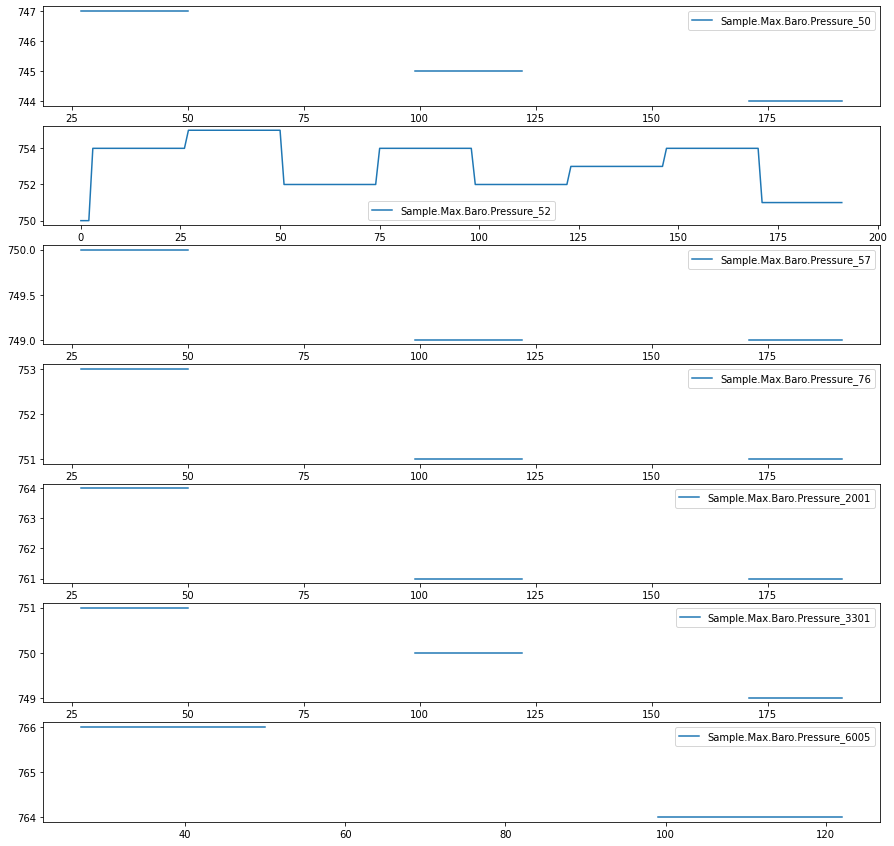

In [ ]:
# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(32, 39)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


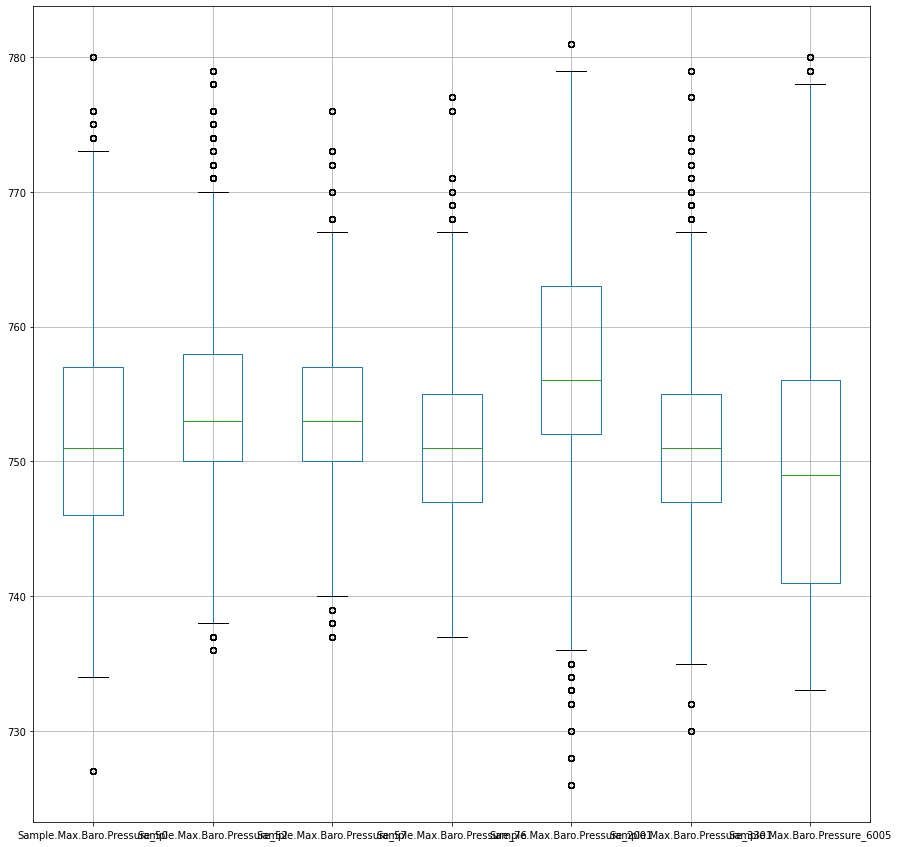

In [ ]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [ ]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

Sample.Max.Baro.Pressure_50  ...  Sample.Max.Baro.Pressure_6005
count                 12475.000000  ...                   11335.000000
mean                    751.612024  ...                     750.268461
std                       7.508502  ...                      10.297430
min                     727.000000  ...                     733.000000
25%                     746.000000  ...                     741.000000
50%                     751.000000  ...                     749.000000
75%                     757.000000  ...                     756.000000
max                     780.000000  ...                     780.000000

[8 rows x 7 columns]

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample.Max.Baro.Pressure_50    12475 non-null  float64
 1   Sample.Max.Baro.Pressure_52    36565 non-null  float64
 2   Sample.Max.Baro.Pressure_57    11641 non-null  float64
 3   Sample.Max.Baro.Pressure_76    12376 non-null  float64
 4   Sample.Max.Baro.Pressure_2001  12204 non-null  float64
 5   Sample.Max.Baro.Pressure_3301  12638 non-null  float64
 6   Sample.Max.Baro.Pressure_6005  11335 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


##Los datos se ven sin outliers.

###Análisis grupo 8

*   **Grupo 8**
  *   Sample.Min.Baro.Pressure_50
  *   Sample.Min.Baro.Pressure_52
  *   Sample.Min.Baro.Pressure_57
  *   Sample.Min.Baro.Pressure_76
  *   Sample.Min.Baro.Pressure_2001
  *   Sample.Min.Baro.Pressure_3301
  *   Sample.Min.Baro.Pressure_6005

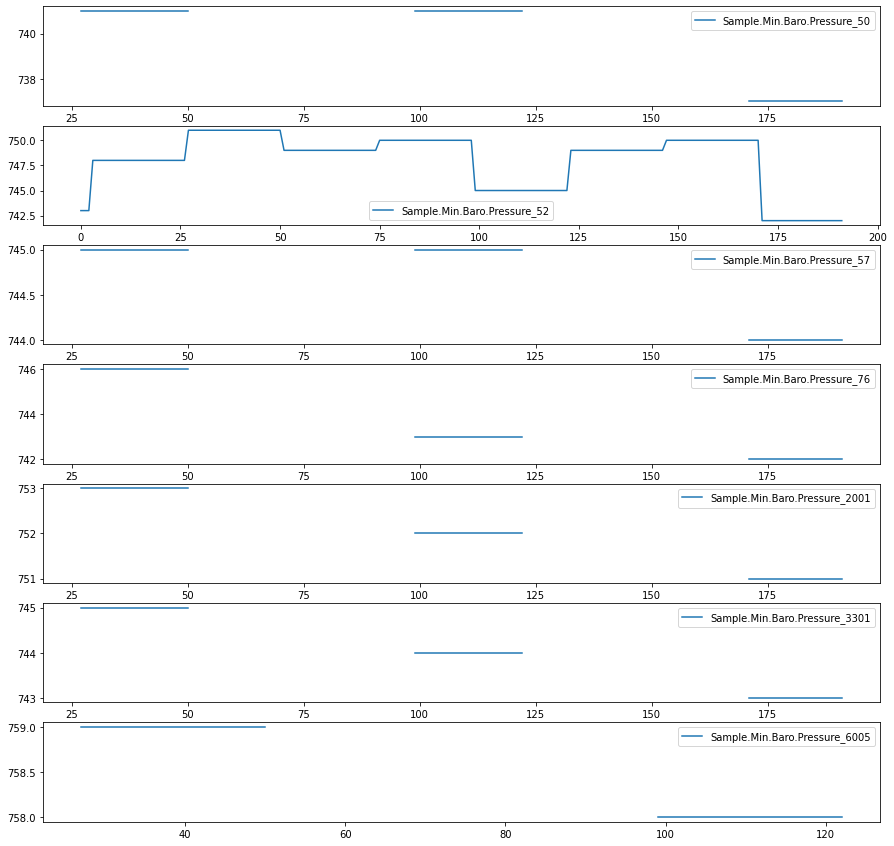

In [ ]:
# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(39, 46)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


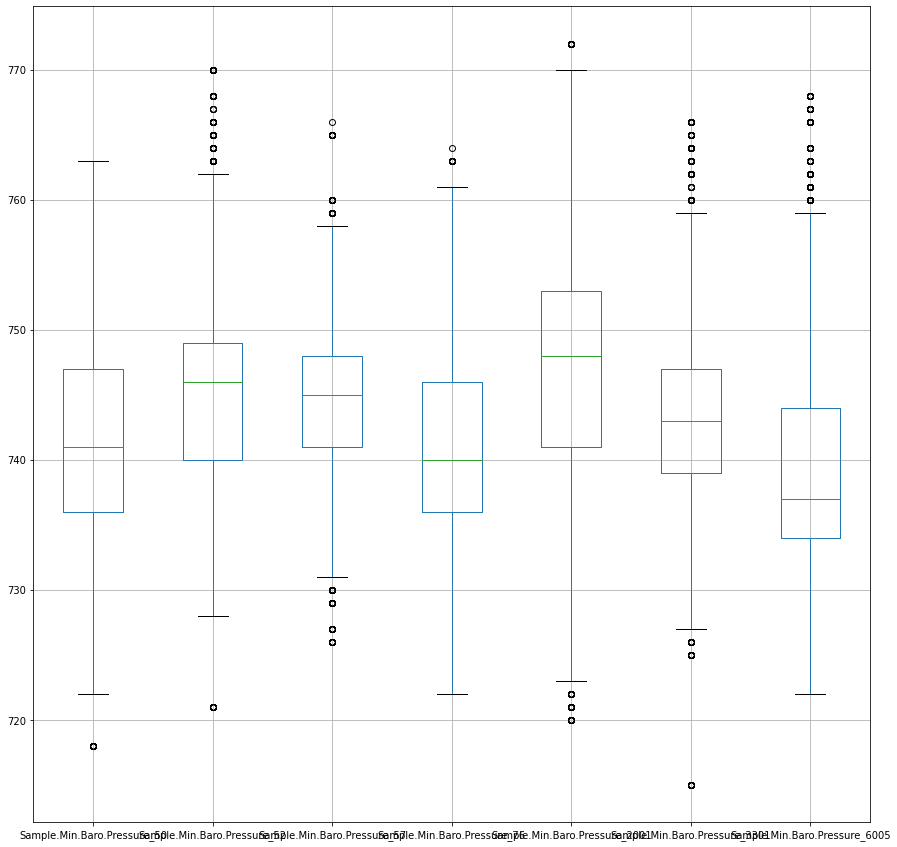

In [ ]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [ ]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

Sample.Min.Baro.Pressure_50  ...  Sample.Min.Baro.Pressure_6005
count                 12379.000000  ...                   11327.000000
mean                    741.842556  ...                     740.182219
std                       7.283583  ...                       9.267723
min                     718.000000  ...                     722.000000
25%                     736.000000  ...                     734.000000
50%                     741.000000  ...                     737.000000
75%                     747.000000  ...                     744.000000
max                     763.000000  ...                     768.000000

[8 rows x 7 columns]

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample.Min.Baro.Pressure_50    12379 non-null  float64
 1   Sample.Min.Baro.Pressure_52    36613 non-null  float64
 2   Sample.Min.Baro.Pressure_57    11665 non-null  float64
 3   Sample.Min.Baro.Pressure_76    12376 non-null  float64
 4   Sample.Min.Baro.Pressure_2001  12192 non-null  float64
 5   Sample.Min.Baro.Pressure_3301  12590 non-null  float64
 6   Sample.Min.Baro.Pressure_6005  11327 non-null  float64
dtypes: float64(7)
memory usage: 2.0 MB


##Los datos se ven sin outliers.

##4 Exploración de la variable objetivo

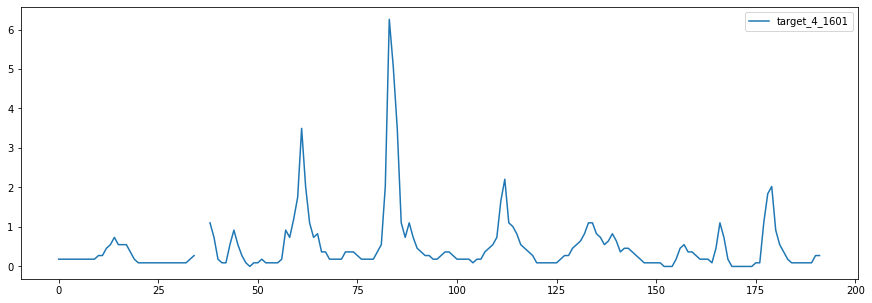

In [17]:
# group data by chunks
values = df.values
chunks = to_chunks(values)
columnsToPlot = range(46, 47)
# plot inputs for some chunks
plot_chunk_columns(chunks, [1], name_columns, columnsToPlot)

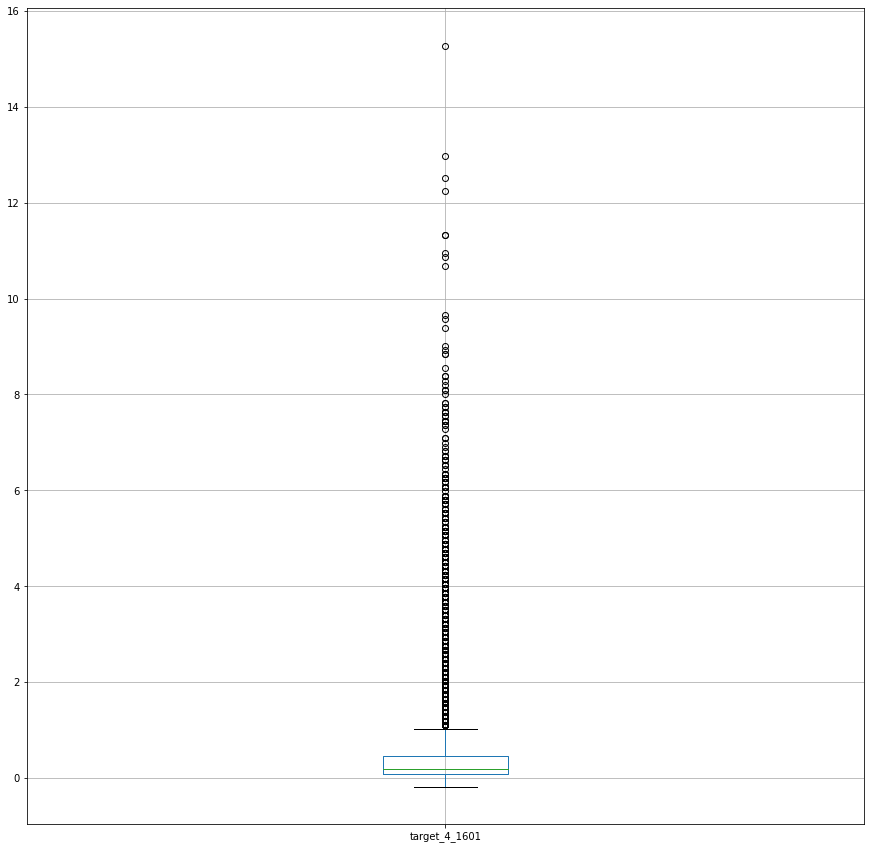

In [ ]:
# boxplot for input variables
plot_chunk_columns_boxplots(df, columnsToPlot)

In [ ]:
dataSummary = df.iloc[:, columnsToPlot]
dataSummary.describe()

target_4_1601
count   37270.000000
mean        0.398977
std         0.676620
min        -0.184045
25%         0.092022
50%         0.184045
75%         0.460112
max        15.275708

In [ ]:
dataSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37619 entries, 0 to 37618
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   target_4_1601  37270 non-null  float64
dtypes: float64(1)
memory usage: 294.0 KB


Debido al diagrama de caja se hacen evidente posibles outliers. Lo cual se espera contrastar con información de la literatura.

Para hacer esto, debemos identificar la variable a tratar. En este caso, la variable es "target_4_1601", esto significa que se espera predecir la variable 4 en el sensor 1601. La variable 4 corresponde a la medición de "Datos brutos de PM2.5".

Si hacemos el resumen estadistico de la variable obtenemos que los valores minimo y maximo definen el rango de valores: [-0.184 , 15.27]. Los valores de PM2.5 vistos en la literatura, indican que para zonas de incendios es posible obtener mediciones de PM2.5 cercanos a los 300, además para zonas urbanas se considera que valores entre 0 y 50 entán dentro de lo normal, y para la OMS valores de PM2.5 bajo 10 no indican mayor riesgo para la salud humana. De esta manera entonces, se decide eliminar los valores negativos que puedan exisitir en la variable objetivo y mantener el resto, debido a que parecen estar dentro de los rangos habituales. 

Paper que realizan mediciones de PM2.5: https://www.sciencedirect.com/science/article/pii/S1309104215305456

Predictor online de la calidad del aire de Illinois: https://aqicn.org/city/usa/illinois/chi_sp/es/

Guías de la calidad del aire de la OMS: https://apps.who.int/iris/bitstream/handle/10665/69478/WHO_SDE_PHE_OEH_06.02_spa.pdf?sequence=1

##De esta manera, para finalizar la segunda iteración se transformaron los días a números y se convierten en NA los valores de la variable objetivo que sean negativos y se elimina la columna rowID.

In [ ]:
import numpy as np
# Se transforman en NA los valores menos o iguales a 0 de la variable objetivo
df['target_4_1601'] = np.where(df['target_4_1601']<=0, np.nan, df['target_4_1601'])

In [ ]:
dataSummary = df.iloc[:, 45:46]
dataSummary.describe()

Sample.Min.Baro.Pressure_6005
count                   11327.000000
mean                      740.182219
std                         9.267723
min                       722.000000
25%                       734.000000
50%                       737.000000
75%                       744.000000
max                       768.000000

In [ ]:
df.head()

rowID  chunkID  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0      1        1  ...                            NaN       0.184045
1      2        1  ...                            NaN       0.184045
2      3        1  ...                            NaN       0.184045
3      4        1  ...                            NaN       0.184045
4      5        1  ...                            NaN       0.184045

[5 rows x 47 columns]

In [ ]:
# deleting a column 
del df['rowID'] 

In [ ]:
df.head()

chunkID  position_within_chunk  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0        1                      1  ...                            NaN       0.184045
1        1                      2  ...                            NaN       0.184045
2        1                      3  ...                            NaN       0.184045
3        1                      4  ...                            NaN       0.184045
4        1                      5  ...                            NaN       0.184045

[5 rows x 46 columns]

In [ ]:
#Se escribe la data
df.to_csv('filterData2.csv', index = False)